In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import librosa     #for Audio Analysis
import librosa.display    #need to import from librosa

#import audio playback widget
import IPython.display as ipd
from IPython.display import Image

import os
import pickle



ModuleNotFoundError: No module named 'librosa'

In [2]:

data,sampling_rate=librosa.load('/home/gaurav/Downloads/Datasets/anger/anger002.wav')
ipd.Audio(data=data,rate=sampling_rate)


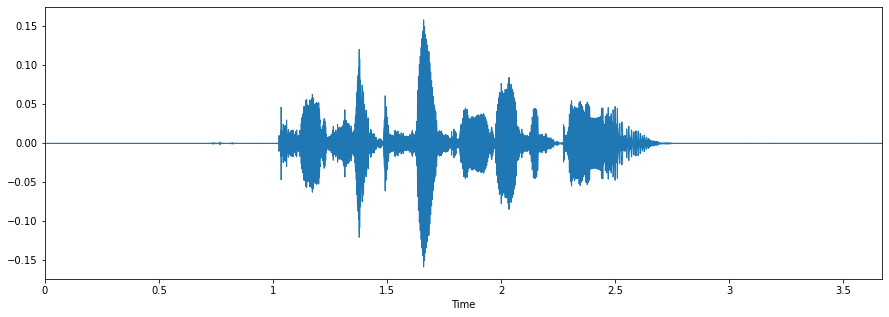

In [3]:

plt.figure(figsize=(15,5))
librosa.display.waveplot(data,sr=sampling_rate)

In [4]:
D=librosa.stft(data)
print(D.shape)

(1025, 159)


/home/gaurav/.local/lib/python3.6/site-packages/librosa/core/spectrum.py:1702: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


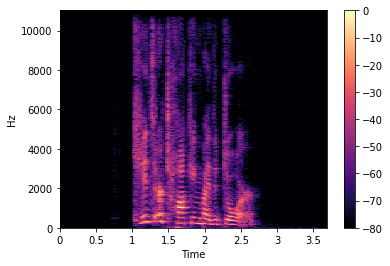

In [5]:
log_power=librosa.amplitude_to_db(D,ref=np.max)
librosa.display.specshow(log_power,x_axis='time',y_axis='linear')
plt.colorbar()

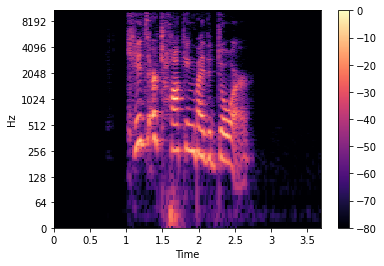

In [6]:
#log-frequency axis

librosa.display.specshow(log_power,x_axis='time',y_axis='log')
plt.colorbar()

In [7]:
# path = '/home/gaurav/Downloads/Datasets'
# lst = []

# for subdir, dirs, files in os.walk(path):
#     for file in files:
#         try:
            
#         #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
#             X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
#             mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
#         # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
#         # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
#             file = int(file[7:8]) - 1 
#             arr = mfccs, file
#             lst.append(arr)
#       # If the file is not valid, skip it
      
#         except ValueError:
#             continue

In [8]:


dataset_path = os.path.abspath('/home/gaurav/Documents/Datasets')
destination_path = os.path.abspath('/home/gaurav/Documents')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second for example (16KHz)
sampling_rate = 20000 
emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]

In [9]:
# loading dataframes using dataset module 
from util import dataset
df, train_df, test_df = dataset.create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

In [10]:
train_df

,path,label
0,/home/gaurav/Documents/Datasets/anger/anger095...,0
1,/home/gaurav/Documents/Datasets/sad/sad285.wav,5
2,/home/gaurav/Documents/Datasets/happy/happy415...,3
3,/home/gaurav/Documents/Datasets/anger/anger293...,0
4,/home/gaurav/Documents/Datasets/sad/sad416.wav,5
...,...,...
2358,/home/gaurav/Documents/Datasets/anger/anger057...,0
2359,/home/gaurav/Documents/Datasets/neutral/neutra...,4
2360,/home/gaurav/Documents/Datasets/happy/happy013...,3
2361,/home/gaurav/Documents/Datasets/sad/sad305.wav,5


In [11]:
print("Actual Audio :",df['path'][0])
print("Labels:",df['label'][0])

Actual Audio : /home/gaurav/Documents/Datasets/anger/anger095.wav
Labels: 0



### Labels Assigned for emotions : 
- 0 : anger
- 1 : disgust
- 2 : fear
- 3 : happy
- 4 : neutral 
- 5 : sad
- 6 : surprise

In [12]:
unique_label=df.label.unique()
unique_label.sort()
print("Unique Labels in Emotion Dataset are:")
print(*unique_label,sep=',')
unique_label_count=df.label.value_counts(sort=False)
print('\n\nCount of Unique label in emotion dataset are:')
print(*unique_label_count,sep=',')


Unique Labels in Emotion Dataset are:
0,1,2,3,4,5,6


Count of Unique label in emotion dataset are:
436,436,404,405,401,436,436


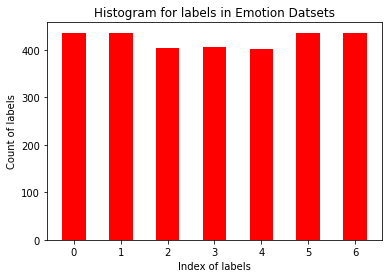

In [13]:
# Histogram of classes 

plt.bar(unique_label,unique_label_count,align='center',width=0.5,color='r')
plt.xlabel('Index of labels')
plt.ylabel('Count of labels')
plt.title('Histogram for labels in Emotion Datsets')
plt.show()

## Data Pre-Processing

Calculating MFCC, Pitch, magnitude, Chroma features.

In [14]:
from util.feature_extraction import get_audio_features
from util.feature_extraction import get_features_dataframe

# train_features,train_label=get_features_dataframe(train_df,sampling_rate)
# test_features,test_label=get_features_dataframe(test_df,sampling_rate)

# train_features.to_pickle('./features_dataframe/train_features')
# train_label.to_pickle('./features_dataframe/train_label')
# test_features.to_pickle('./features_dataframe/test_features')
# test_label.to_pickle('./features_dataframe/test_label')
                         
                         
train_features = pd.read_pickle('./features_dataframe/train_features')
train_label = pd.read_pickle('./features_dataframe/train_label')
test_features = pd.read_pickle('./features_dataframe/test_features')
test_label = pd.read_pickle('./features_dataframe/test_label')

In [15]:
train_features=train_features.fillna(0)
test_features=test_features.fillna(0)

train_features

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-522.075867,69.504066,-14.727759,8.183310,-5.409977,6.693387,-16.255905,-1.078048,-8.829034,-5.143381,...,0.451519,0.529559,0.500371,0.492102,0.466623,0.442230,0.487002,0.511276,0.559338,0.573987
1,-485.032471,107.831604,-25.305296,13.172301,2.012082,7.894076,-17.973392,-2.093006,-19.139160,-12.915413,...,0.346873,0.443641,0.573528,0.599615,0.491140,0.467295,0.451337,0.339715,0.238174,0.255568
2,-235.723236,143.466064,-9.140343,22.090546,16.000683,-16.771889,-13.381343,-6.918923,-6.083766,-17.774216,...,0.481489,0.404806,0.356026,0.348690,0.303861,0.296184,0.392149,0.462966,0.458292,0.471231
3,-393.120026,113.676117,-29.428745,2.167695,9.608056,27.181908,-29.815231,-5.939925,-7.478299,-10.824514,...,0.351599,0.380868,0.533773,0.622500,0.559785,0.518806,0.441587,0.382996,0.363020,0.342568
4,-325.961578,125.662148,16.930923,35.076366,29.700811,-5.911536,-9.372103,3.196021,4.530219,-11.502192,...,0.432699,0.413506,0.402566,0.383745,0.336846,0.320171,0.342111,0.443264,0.489597,0.557541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,-536.138245,107.296783,-13.940331,9.166281,14.637120,23.477375,-13.114096,1.526648,-8.559909,-14.175097,...,0.481046,0.379600,0.307445,0.306045,0.347638,0.393553,0.402744,0.436555,0.514164,0.557175
2359,-478.251434,124.457741,-9.186652,2.670075,2.444756,13.158679,-23.553303,-8.266448,-8.389320,-15.812901,...,0.355739,0.404688,0.585624,0.660306,0.534135,0.418414,0.304064,0.218472,0.259467,0.330124
2360,-649.470642,93.445770,-5.477227,9.107521,6.343001,13.147860,-6.635685,0.747268,-8.190608,-5.766635,...,0.568839,0.479902,0.376425,0.378311,0.409890,0.417633,0.494921,0.516877,0.508650,0.416216
2361,-486.901459,61.463165,-40.527332,10.068234,-19.380865,0.526832,-28.711586,-7.150748,-17.737392,-21.904305,...,0.243414,0.263729,0.436077,0.618324,0.480501,0.443469,0.548756,0.387011,0.215935,0.197043


In [16]:
# By using .ravel() : Converting 2D to 1D e.g. (2044,1) -> (2044,). To prevent DataConversionWarning

X_train=np.array(train_features)
y_train=np.array(train_label).ravel()
X_test=np.array(test_features)
y_test=np.array(test_label).ravel()


In [17]:
y_train[:5]
print(X_train.shape)

(2363, 65)


In [18]:
# build Neural network and Create Desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Conv2D,MaxPool2D,InputLayer,MaxPooling1D,AveragePooling1D,MaxPooling2D
from keras.layers import Flatten,Dropout,Activation,BatchNormalization,LSTM      #Input
from keras.layers import Dense    #Embedding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.engine.hypermodel import HyperModel




Using TensorFlow backend.
/home/gaurav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gaurav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gaurav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gaurav/.local/lib/python3.6/site-packages/tensorflow/python

In [19]:
#one-hot encoding
lb=LabelEncoder()

y_train=np_utils.to_categorical(lb.fit_transform(y_train))
y_test=np_utils.to_categorical(lb.fit_transform(y_test))

In [20]:
y_train[:5]
print(y_train.shape[1])

7




### Changing dimension for CNN model

In [21]:

x_traincnn=np.expand_dims(X_train,axis=2)             #its shows the depth of 1 for CNN model
x_testcnn=np.expand_dims(X_test,axis=2)

In [22]:


x_traincnn.shape

(2363, 65, 1)

### Model creation

In [23]:
# def create_model_LSTM():
#     ### LSTM model, referred to the model A in the report
#     model = Sequential()
#     model.add(LSTM(128, return_sequences=False, input_shape=(65, 1)))
#     model.add(Dense(64))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.2))
    
#     model.add(Dense(32))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.2))
   
#     model.add(Dense(32))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.2))
   
#     model.add(Dense(32))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.2))
   
#     model.add(Dense(7))
#     model.add(Activation('softmax'))

#     model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
#     return model


In [24]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
# from tensorflow.python.keras.callbacks import EarlyStopping
# callbacks = [EarlyStopping(monitor='val_loss',
#                            patience=10,
#                            verbose=1,
#                            min_delta=0.01,
#                            mode='min')]

In [26]:
# modelA=create_model_LSTM()
# lstm=modelA.fit(x_traincnn,y_train,batch_size=128,epochs=200,validation_data=(x_testcnn,y_test),shuffle=True)

In [27]:
# def create_model_CNN():
#     ### CNN model, referred to the model B in the report
#     model = Sequential()
#     model.add(Conv1D(8, kernel_size = 3, input_shape=(65, 1)))
#     model.add(Activation('relu'))
#     model.add(Conv1D(16,kernel_size = 3))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.1))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv1D(32, kernel_size = 3))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.1))
#     model.add(Conv1D(16, kernel_size = 3))
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Flatten())
#     model.add(Dense(7))
#     model.add(Activation('softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
#     return model

In [28]:
# modelB=create_model_CNN()
# app=modelB.fit(x_traincnn,y_train,batch_size=16,epochs=200,validation_data=(x_testcnn,y_test))

In [29]:
# def new_CNN():
#     ### CNN model, referred to the model C in the report
#     model = Sequential()
#     model.add(Conv1D(8, 5,padding='same', input_shape=(65, 1)))
#     model.add(Activation('relu'))
#     model.add(Conv1D(16, 5,padding='same'))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.1))
#     model.add(MaxPooling1D(pool_size=(8)))
#     model.add(Conv1D(32, 5,padding='same',))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.1))
#     model.add(Conv1D(16, 5,padding='same',))
#     model.add(Activation('relu'))
#     model.add(Flatten())
#     model.add(Dense(7))
#     model.add(Activation('softmax'))
#     opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
#     model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
#     return model

In [30]:
# modelc=new_CNN()
# cpp=modelc.fit(x_traincnn,y_train,batch_size=16,epochs=2,validation_data=(x_testcnn,y_test))

In [31]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

In [32]:
# model=KerasClassifier(build_fn=Sequential())
# learning=[0.001,0.0001]
# epochs=np.array([100,200,300,400,500])
# batches=np.array([5,10,15,20])

In [75]:
model = Sequential()
input_shape=(65,1)
model.add(Conv1D(24, 5, input_shape=input_shape))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Activation('relu'))

model.add(Conv1D(48,5, padding="valid"))
model.add(MaxPooling1D(pool_size= (2)))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Conv1D(48, 5, padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(rate=0.5))

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(
optimizer="Adam",loss="categorical_crossentropy",
metrics=['accuracy'])

app=model.fit(x_traincnn,y_train,epochs=800,batch_size=600,validation_data= (x_testcnn,y_test))

Train on 2363 samples, validate on 591 samples
Epoch 1/800
2363/2363 [==============================] - ETA: 2s - loss: 17.8431 - accuracy: 0.140 - 2s 879us/step - loss: 12.5687 - accuracy: 0.1447 - val_loss: 3.4516 - val_accuracy: 0.1777
Epoch 2/800
2363/2363 [==============================] - ETA: 0s - loss: 8.0970 - accuracy: 0.15 - 0s 34us/step - loss: 7.3896 - accuracy: 0.1443 - val_loss: 3.1162 - val_accuracy: 0.1540
Epoch 3/800
2363/2363 [==============================] - ETA: 0s - loss: 5.4218 - accuracy: 0.15 - 0s 36us/step - loss: 4.6068 - accuracy: 0.1523 - val_loss: 2.2090 - val_accuracy: 0.1641
Epoch 4/800
2363/2363 [==============================] - ETA: 0s - loss: 3.5559 - accuracy: 0.14 - 0s 35us/step - loss: 3.2423 - accuracy: 0.1519 - val_loss: 2.0563 - val_accuracy: 0.1303
Epoch 5/800
2363/2363 [==============================] - ETA: 0s - loss: 2.7734 - accuracy: 0.14 - 0s 35us/step - loss: 2.5872 - accuracy: 0.1519 - val_loss: 1.9500 - val_accuracy: 0.1472
Epoch 6/8

2363/2363 [==============================] - ETA: 0s - loss: 1.5430 - accuracy: 0.38 - 0s 34us/step - loss: 1.5297 - accuracy: 0.3974 - val_loss: 1.4359 - val_accuracy: 0.4332
Epoch 88/800
2363/2363 [==============================] - ETA: 0s - loss: 1.5428 - accuracy: 0.39 - 0s 35us/step - loss: 1.5217 - accuracy: 0.3931 - val_loss: 1.4325 - val_accuracy: 0.4399
Epoch 89/800
2363/2363 [==============================] - ETA: 0s - loss: 1.5359 - accuracy: 0.38 - 0s 32us/step - loss: 1.5135 - accuracy: 0.4029 - val_loss: 1.4165 - val_accuracy: 0.4433
Epoch 90/800
2363/2363 [==============================] - ETA: 0s - loss: 1.5407 - accuracy: 0.40 - 0s 34us/step - loss: 1.5110 - accuracy: 0.4092 - val_loss: 1.4159 - val_accuracy: 0.4450
Epoch 91/800
2363/2363 [==============================] - ETA: 0s - loss: 1.5281 - accuracy: 0.38 - 0s 33us/step - loss: 1.5062 - accuracy: 0.3974 - val_loss: 1.4132 - val_accuracy: 0.4552
Epoch 92/800
2363/2363 [==============================] - ETA: 0s - 

2363/2363 [==============================] - ETA: 0s - loss: 1.1918 - accuracy: 0.51 - 0s 33us/step - loss: 1.2142 - accuracy: 0.5226 - val_loss: 1.1967 - val_accuracy: 0.5533
Epoch 174/800
2363/2363 [==============================] - ETA: 0s - loss: 1.1821 - accuracy: 0.54 - 0s 35us/step - loss: 1.1849 - accuracy: 0.5497 - val_loss: 1.1889 - val_accuracy: 0.5651
Epoch 175/800
2363/2363 [==============================] - ETA: 0s - loss: 1.2545 - accuracy: 0.50 - 0s 33us/step - loss: 1.2048 - accuracy: 0.5362 - val_loss: 1.1735 - val_accuracy: 0.5651
Epoch 176/800
2363/2363 [==============================] - ETA: 0s - loss: 1.1864 - accuracy: 0.53 - 0s 33us/step - loss: 1.1893 - accuracy: 0.5396 - val_loss: 1.1919 - val_accuracy: 0.5550
Epoch 177/800
2363/2363 [==============================] - ETA: 0s - loss: 1.1693 - accuracy: 0.56 - 0s 33us/step - loss: 1.1995 - accuracy: 0.5379 - val_loss: 1.2004 - val_accuracy: 0.5533
Epoch 178/800
2363/2363 [==============================] - ETA: 

2363/2363 [==============================] - ETA: 0s - loss: 0.9822 - accuracy: 0.62 - 0s 35us/step - loss: 0.9836 - accuracy: 0.6297 - val_loss: 1.0874 - val_accuracy: 0.5990
Epoch 260/800
2363/2363 [==============================] - ETA: 0s - loss: 1.0350 - accuracy: 0.63 - 0s 32us/step - loss: 1.0188 - accuracy: 0.6200 - val_loss: 1.0705 - val_accuracy: 0.5973
Epoch 261/800
2363/2363 [==============================] - ETA: 0s - loss: 0.9920 - accuracy: 0.62 - 0s 36us/step - loss: 1.0012 - accuracy: 0.6166 - val_loss: 1.0739 - val_accuracy: 0.5973
Epoch 262/800
2363/2363 [==============================] - ETA: 0s - loss: 0.9682 - accuracy: 0.65 - 0s 35us/step - loss: 0.9885 - accuracy: 0.6356 - val_loss: 1.0690 - val_accuracy: 0.6074
Epoch 263/800
2363/2363 [==============================] - ETA: 0s - loss: 0.9901 - accuracy: 0.62 - 0s 32us/step - loss: 0.9913 - accuracy: 0.6280 - val_loss: 1.0707 - val_accuracy: 0.6041
Epoch 264/800
2363/2363 [==============================] - ETA: 

2363/2363 [==============================] - ETA: 0s - loss: 0.8357 - accuracy: 0.68 - 0s 34us/step - loss: 0.8452 - accuracy: 0.6881 - val_loss: 1.0232 - val_accuracy: 0.6345
Epoch 346/800
2363/2363 [==============================] - ETA: 0s - loss: 0.9456 - accuracy: 0.64 - 0s 34us/step - loss: 0.8484 - accuracy: 0.6894 - val_loss: 1.0289 - val_accuracy: 0.6430
Epoch 347/800
2363/2363 [==============================] - ETA: 0s - loss: 0.9110 - accuracy: 0.65 - 0s 35us/step - loss: 0.8625 - accuracy: 0.6665 - val_loss: 1.0238 - val_accuracy: 0.6531
Epoch 348/800
2363/2363 [==============================] - ETA: 0s - loss: 0.8423 - accuracy: 0.68 - 0s 35us/step - loss: 0.8283 - accuracy: 0.6906 - val_loss: 1.0223 - val_accuracy: 0.6481
Epoch 349/800
2363/2363 [==============================] - ETA: 0s - loss: 0.8734 - accuracy: 0.67 - 0s 34us/step - loss: 0.8561 - accuracy: 0.6737 - val_loss: 1.0353 - val_accuracy: 0.6430
Epoch 350/800
2363/2363 [==============================] - ETA: 

2363/2363 [==============================] - ETA: 0s - loss: 0.7480 - accuracy: 0.74 - 0s 31us/step - loss: 0.7546 - accuracy: 0.7262 - val_loss: 1.0097 - val_accuracy: 0.6345
Epoch 432/800
2363/2363 [==============================] - ETA: 0s - loss: 0.7963 - accuracy: 0.69 - 0s 34us/step - loss: 0.7667 - accuracy: 0.7173 - val_loss: 1.0170 - val_accuracy: 0.6379
Epoch 433/800
2363/2363 [==============================] - ETA: 0s - loss: 0.7275 - accuracy: 0.74 - 0s 32us/step - loss: 0.7561 - accuracy: 0.7207 - val_loss: 1.0059 - val_accuracy: 0.6616
Epoch 434/800
2363/2363 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.74 - 0s 34us/step - loss: 0.7804 - accuracy: 0.7118 - val_loss: 1.0092 - val_accuracy: 0.6548
Epoch 435/800
2363/2363 [==============================] - ETA: 0s - loss: 0.7478 - accuracy: 0.71 - 0s 34us/step - loss: 0.7420 - accuracy: 0.7279 - val_loss: 1.0181 - val_accuracy: 0.6548
Epoch 436/800
2363/2363 [==============================] - ETA: 

2363/2363 [==============================] - ETA: 0s - loss: 0.6543 - accuracy: 0.74 - 0s 34us/step - loss: 0.6795 - accuracy: 0.7435 - val_loss: 0.9981 - val_accuracy: 0.6616
Epoch 518/800
2363/2363 [==============================] - ETA: 0s - loss: 0.6540 - accuracy: 0.77 - 0s 35us/step - loss: 0.6666 - accuracy: 0.7609 - val_loss: 0.9965 - val_accuracy: 0.6616
Epoch 519/800
2363/2363 [==============================] - ETA: 0s - loss: 0.6580 - accuracy: 0.75 - 0s 32us/step - loss: 0.6695 - accuracy: 0.7507 - val_loss: 0.9882 - val_accuracy: 0.6717
Epoch 520/800
2363/2363 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.76 - 0s 34us/step - loss: 0.6547 - accuracy: 0.7596 - val_loss: 0.9829 - val_accuracy: 0.6717
Epoch 521/800
2363/2363 [==============================] - ETA: 0s - loss: 0.6466 - accuracy: 0.73 - 0s 32us/step - loss: 0.6631 - accuracy: 0.7550 - val_loss: 1.0072 - val_accuracy: 0.6616
Epoch 522/800
2363/2363 [==============================] - ETA: 

2363/2363 [==============================] - ETA: 0s - loss: 0.6991 - accuracy: 0.73 - 0s 36us/step - loss: 0.6323 - accuracy: 0.7715 - val_loss: 1.0127 - val_accuracy: 0.6616
Epoch 604/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5934 - accuracy: 0.79 - 0s 35us/step - loss: 0.5844 - accuracy: 0.7922 - val_loss: 0.9927 - val_accuracy: 0.6785
Epoch 605/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5611 - accuracy: 0.78 - 0s 35us/step - loss: 0.6079 - accuracy: 0.7715 - val_loss: 0.9864 - val_accuracy: 0.6768
Epoch 606/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5953 - accuracy: 0.79 - 0s 36us/step - loss: 0.6070 - accuracy: 0.7732 - val_loss: 0.9986 - val_accuracy: 0.6734
Epoch 607/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5622 - accuracy: 0.81 - 0s 35us/step - loss: 0.6059 - accuracy: 0.7842 - val_loss: 0.9999 - val_accuracy: 0.6701
Epoch 608/800
2363/2363 [==============================] - ETA: 

Epoch 646/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5586 - accuracy: 0.80 - 0s 33us/step - loss: 0.5842 - accuracy: 0.7939 - val_loss: 1.0002 - val_accuracy: 0.6633
Epoch 647/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5628 - accuracy: 0.79 - 0s 35us/step - loss: 0.5846 - accuracy: 0.7825 - val_loss: 1.0013 - val_accuracy: 0.6734
Epoch 648/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5182 - accuracy: 0.80 - 0s 34us/step - loss: 0.5512 - accuracy: 0.8096 - val_loss: 1.0001 - val_accuracy: 0.6717
Epoch 649/800
2363/2363 [==============================] - ETA: 0s - loss: 0.6121 - accuracy: 0.76 - 0s 35us/step - loss: 0.5812 - accuracy: 0.7833 - val_loss: 0.9949 - val_accuracy: 0.6684
Epoch 650/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5886 - accuracy: 0.78 - 0s 33us/step - loss: 0.5689 - accuracy: 0.7948 - val_loss: 0.9902 - val_accuracy: 0.6785
Epoch 651/800
2363/2363 [=========================

2363/2363 [==============================] - ETA: 0s - loss: 0.5552 - accuracy: 0.77 - 0s 34us/step - loss: 0.5200 - accuracy: 0.8011 - val_loss: 0.9926 - val_accuracy: 0.6684
Epoch 733/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.81 - 0s 34us/step - loss: 0.5461 - accuracy: 0.8041 - val_loss: 0.9932 - val_accuracy: 0.6751
Epoch 734/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5504 - accuracy: 0.78 - 0s 32us/step - loss: 0.5458 - accuracy: 0.7960 - val_loss: 0.9962 - val_accuracy: 0.6819
Epoch 735/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5841 - accuracy: 0.79 - 0s 34us/step - loss: 0.5234 - accuracy: 0.8113 - val_loss: 1.0065 - val_accuracy: 0.6734
Epoch 736/800
2363/2363 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.79 - 0s 34us/step - loss: 0.5351 - accuracy: 0.8015 - val_loss: 0.9927 - val_accuracy: 0.6684
Epoch 737/800
2363/2363 [==============================] - ETA: 

In [41]:

# param=dict(nb_epoch=epochs,batch_size=batches,lr=learning)
# grid=GridSearchCV(estimator=model,param_grid=param).fit(x_traincnn,y_train)

In [ ]:
cnn=model.fit(x_traincnn,y_train,batch_size=16,epochs=500,validation_data=(x_testcnn,y_test))

### Loss visualization

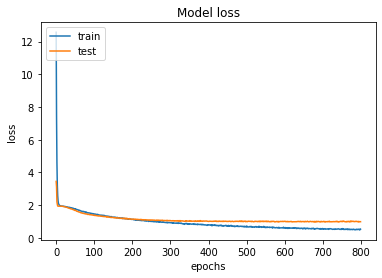

In [76]:
plt.plot(app.history['loss'])
plt.plot(app.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show() 

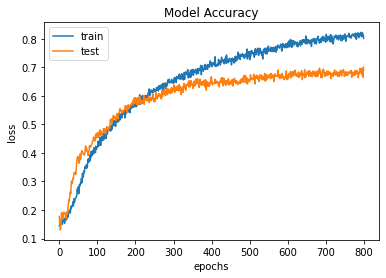

In [77]:
plt.plot(app.history['accuracy'])
plt.plot(app.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show() 

In [3]:
model_name = 'ggg3.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

NameError: name 'os' is not defined

In [79]:
import json
model_json = model.to_json()
with open("ggg3.json", "w") as json_file:
    json_file.write(model_json)

In [50]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('ggg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/ggg.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 71.74%


### Prediction on Test Data

In [51]:
preds=loaded_model.predict(x_testcnn,batch_size=32,verbose=1)

591/591 [==============================] - ETA:  - 0s 496us/step


In [52]:

print(preds)
pred=preds.argmax(axis=1)
pred=np_utils.to_categorical(lb.fit_transform(pred))
pred

[[2.90328227e-02 2.02175761e-06 2.54231513e-01 ... 7.46871729e-06
  7.16723144e-01 3.50145513e-08]
 [1.41818691e-02 4.85993959e-02 4.38897051e-02 ... 1.47341646e-03
  4.15842459e-02 6.02425158e-01]
 [3.14164504e-06 1.24991085e-11 9.99689221e-01 ... 2.31212150e-11
  2.72716192e-04 4.04618550e-06]
 ...
 [4.22755033e-01 7.69766630e-05 1.68406129e-01 ... 4.79340524e-04
  2.41622463e-01 7.43459351e-03]
 [2.49669656e-01 3.16619803e-03 4.55772996e-01 ... 1.25439337e-03
  3.99456881e-02 5.51805347e-02]
 [1.72335154e-03 8.00591707e-02 1.51695296e-01 ... 4.33827704e-03
  7.38020718e-01 2.09076926e-02]]


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [53]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.64      0.71       103
           1       0.69      0.78      0.73        72
           2       0.61      0.65      0.62        93
           3       0.65      0.65      0.65        72
           4       0.78      0.87      0.82        71
           5       0.75      0.61      0.67        96
           6       0.77      0.88      0.82        84

   micro avg       0.72      0.72      0.72       591
   macro avg       0.72      0.73      0.72       591
weighted avg       0.72      0.72      0.72       591
 samples avg       0.72      0.72      0.72       591



In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
print(cm)

[[66 11 13  6  1  3  3]
 [ 0 56  2  3  1  2  8]
 [ 9  6 60  8  1  7  2]
 [ 8  3  5 47  1  1  7]
 [ 0  0  2  0 62  6  1]
 [ 1  3 14  7 11 59  1]
 [ 0  2  3  1  3  1 74]]


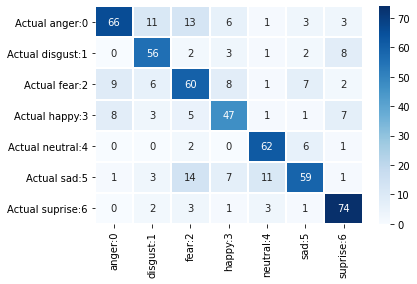

In [55]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['anger:0', 'disgust:1','fear:2','happy:3','neutral:4','sad:5','suprise:6'], 
                                 index=['Actual anger:0', 'Actual disgust:1','Actual fear:2','Actual happy:3','Actual neutral:4','Actual sad:5','Actual suprise:6'])
sns.heatmap(cm_matrix, annot=True,fmt='d', cmap='Blues',linewidths=1)


In [ ]:

import record_audio
record_audio.Record()

demo_audio_path = './demo_audio.wav'
ipd.Audio(demo_audio_path)
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)

mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

livepreds = loaded_model.predict(demo_audio_features, 
                         batch_size=32, 
                         verbose=1)

emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
index = livepreds.argmax(axis=1).item()
print(emotions[index])